In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier, LinearRegression
import time
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in range(1, len(X_train),10000):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val) 
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m])) 
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

In [2]:
# Load Data
FaultPecent = pd.read_csv('data/Mon_Dis_JPCC_CRACK_INDEX.csv')
TST = pd.read_csv('data/TST_L05B.csv')
Hum = pd.read_csv('data/humidity.csv')
Temp = pd.read_csv('data/CLM_VWS_TEMP_ANNUAL.csv')
Traffic = pd.read_csv('data/AnnualTraffic.csv')

In [3]:
FaultPecent = FaultPecent[['SHRP_ID','SURVEY_DATE','HPMS16_CRACKING_PERCENT_JPCC']].dropna()
FaultPecent['SURVEY_DATE'] = pd.DatetimeIndex(FaultPecent['SURVEY_DATE']).year
FaultPecent.rename(columns = {'SURVEY_DATE':'YEAR'}, inplace = True)
TST = TST[['SHRP_ID','MATL_CODE']]
Hum = Hum[['SHRP_ID','YEAR','MAX_ANN_HUM_AVG','MIN_ANN_HUM_AVG']]
Temp = Temp[['SHRP_ID','YEAR','MEAN_ANN_TEMP_AVG']]
Traffic = Traffic[['SHRP_ID','YEAR','ANNUAL_TRUCK_VOLUME_TREND']]

In [4]:
Prepared_data = pd.merge(FaultPecent,Hum, on = ['SHRP_ID','YEAR']).dropna()
Prepared_data = pd.merge(Prepared_data,Temp, on = ['SHRP_ID','YEAR']).dropna()
Prepared_data = pd.merge(Prepared_data,Traffic, on = ['SHRP_ID','YEAR']).dropna()

In [5]:
# Prepared_data['MATL_CODE'] = OneHotEncoder().fit_transform(Prepared_data['MATL_CODE'].values.reshape(-1,1)).toarray()
Prepared_data['SHRP_ID'] = LabelEncoder().fit_transform(Prepared_data['SHRP_ID'].values.reshape(-1,1))
# Prepared_data['DESCRIPTION'] = OneHotEncoder().fit_transform(Prepared_data['DESCRIPTION'].values.reshape(-1,1)).toarray()
# Prepared_data = Prepared_data.drop(columns='MATL_CODE')
# Prepared_data = Prepared_data.drop(['SHRP_ID'], axis = 1)
# Prepared_data['CRACK_OR_JOINT_EXP'] = LabelEncoder().fit_transform(Prepared_data['CRACK_OR_JOINT_EXP'])

C:\Users\Nicholas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
Target_Labels = Prepared_data[['HPMS16_CRACKING_PERCENT_JPCC']]
Prepared_data = Prepared_data.drop(['HPMS16_CRACKING_PERCENT_JPCC'], axis = 1)

In [7]:
st = time.time()
tree_reg = DecisionTreeRegressor()
tree_scores = cross_val_score(tree_reg, Prepared_data, Target_Labels,scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-tree_scores)
print('Time used:',time.time()-st)
print('rmse scores:',rmse_scores)

Time used: 51.617825984954834
rmse scores: [35.23934008 22.54414108 25.04792348 37.91651529 38.98343449 21.92488295
 25.7100171  31.2120237  22.10857207 20.31230778]


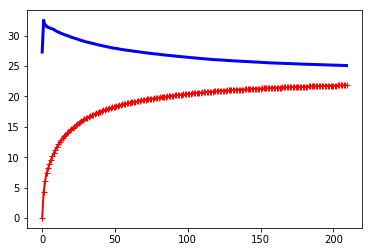

In [8]:
plot_learning_curves(tree_reg, Prepared_data, Target_Labels)

C:\Users\Nicholas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Nicholas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nicholas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Nicholas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rav

Time used: 381.92017936706543
rmse scores: [35.3215491  22.20641034 25.03635033 38.03837507 37.30047218 21.68365057
 23.8370469  28.64758057 22.08906164 20.29613425]


C:\Users\Nicholas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversio

C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarnin

C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarnin

C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarnin

C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarnin

C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarnin

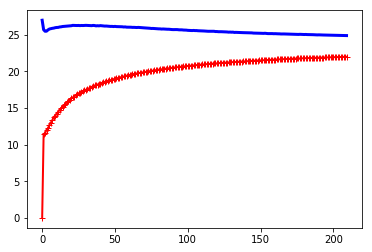

In [9]:
st = time.time()
forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, Prepared_data, Target_Labels,scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-forest_scores)
print('Time used:',time.time()-st)
print('rmse scores:',rmse_scores)
plot_learning_curves(forest_reg, Prepared_data, Target_Labels)

Time used: 5.8366405963897705
rmse scores: [33.92029271 21.58109419 21.88402821 33.70454608 33.463138   21.63650887
 22.50981299 26.02526341 16.87289529 25.87508834]


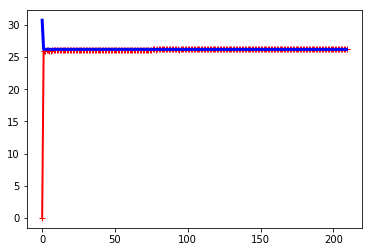

In [10]:
st = time.time()
lin_reg_model = LinearRegression()
lin_scores = cross_val_score(lin_reg_model, Prepared_data, Target_Labels,scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-lin_scores)
print('Time used:',time.time()-st)
print('rmse scores:',rmse_scores)
plot_learning_curves(lin_reg_model, Prepared_data, Target_Labels)